In [2]:
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


In [3]:

drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/My Drive/project work/standsNK_BRT.csv",header=None)
df = pd.read_csv("/content/drive/My Drive/project work/standsNK_BRT.csv")
df

Mounted at /content/drive


,Unnamed: 0,poly_ID,dam_year,storm,snow,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age
0,1,1,2022,0,0,75.912500,1,10,7,3,18.176471,19.782353,20.411765,96.916427,40.705882
1,2,2,2020,0,0,81.607692,2,70,7,3,20.156250,17.093750,16.437500,103.992395,33.281250
2,3,3,2020,0,0,82.820000,2,10,7,3,20.769231,18.297436,18.871795,96.956522,37.333333
3,4,4,2018,0,0,87.025899,2,10,7,3,21.206395,19.579942,21.398256,91.502513,46.122093
4,5,5,2016,0,0,87.733846,2,10,7,3,17.401302,16.726247,17.117137,97.716386,32.498915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321205,321224,695770,2023,0,0,122.975000,3,21,7,2,23.718750,18.900000,21.929688,86.184539,57.148438
321206,321225,695771,2023,0,0,110.536364,3,21,7,2,25.769231,20.028846,23.326923,85.861500,61.884615
321207,321226,695772,2023,0,0,125.488571,3,21,7,2,26.702381,20.511905,24.226190,84.668305,61.476190
321208,321227,695773,2023,0,0,114.950000,2,60,7,2,24.666667,21.020000,24.800000,84.758065,61.066667


In [24]:
df_new_age = df[['storm','dam_age']]
df_new_age

,storm,dam_age
0,0,40.705882
1,0,33.281250
2,0,37.333333
3,0,46.122093
4,0,32.498915
...,...,...
321205,0,57.148438
321206,0,61.884615
321207,0,61.476190
321208,0,61.066667


In [25]:
df_new_age.groupby(['storm']).mean()

,dam_age
storm,
0,55.237482
1,59.472015


In [26]:
df_new_age.groupby(['storm']).max()

,dam_age
storm,
0,174.0
1,135.0


In [27]:
df_new_age.groupby(['storm']).min()

,dam_age
storm,
0,0.313636
1,2.250000


In [28]:
df_new_age.groupby(['storm']).std()

,dam_age
storm,
0,15.48423
1,15.27108


In [29]:
df_new_D = df[['storm','dam_D']]
df_new_D

,storm,dam_D
0,0,20.411765
1,0,16.437500
2,0,18.871795
3,0,21.398256
4,0,17.117137
...,...,...
321205,0,21.929688
321206,0,23.326923
321207,0,24.226190
321208,0,24.800000


In [30]:
df_new_D.groupby(['storm']).mean()

,dam_D
storm,
0,18.299537
1,17.967853


In [31]:
df_new_D.groupby(['storm']).max()

,dam_D
storm,
0,34.412698
1,31.800000


In [32]:
df_new_D.groupby(['storm']).min()

,dam_D
storm,
0,0.027273
1,0.666667


In [33]:
df_new_D.groupby(['storm']).std()

,dam_D
storm,
0,3.617507
1,4.074976


In [34]:
df_new_H = df[['storm','dam_H']]
df_new_H

,storm,dam_H
0,0,19.782353
1,0,17.093750
2,0,18.297436
3,0,19.579942
4,0,16.726247
...,...,...
321205,0,18.900000
321206,0,20.028846
321207,0,20.511905
321208,0,21.020000


In [35]:
df_new_H.groupby(['storm']).mean()

,dam_H
storm,
0,15.564469
1,15.026168


In [36]:
df_new_H.groupby(['storm']).max()

,dam_H
storm,
0,27.868254
1,25.100000


In [37]:
df_new_H.groupby(['storm']).min()

,dam_H
storm,
0,0.027273
1,0.600000


In [38]:
df_new_H.groupby(['storm']).std()

,dam_H
storm,
0,2.796380
1,3.290358


In [40]:
df_new_G = df[['storm','dam_G']]
df_new_G

,storm,dam_G
0,0,18.176471
1,0,20.156250
2,0,20.769231
3,0,21.206395
4,0,17.401302
...,...,...
321205,0,23.718750
321206,0,25.769231
321207,0,26.702381
321208,0,24.666667


In [41]:
df_new_G.groupby(['storm']).mean()

,dam_G
storm,
0,21.290607
1,19.564185


In [42]:
df_new_G.groupby(['storm']).max()

,dam_G
storm,
0,36.000000
1,33.142857


In [43]:
df_new_G.groupby(['storm']).min()

,dam_G
storm,
0,0.018182
1,0.371429


In [44]:
df_new_G.groupby(['storm']).std()

,dam_G
storm,
0,4.190753
1,5.177742


In [30]:
df.columns

Index(['Unnamed: 0', 'poly_ID', 'dam_year', 'storm', 'snow', 'altitude',
       'fertilityc', 'soiltype', 'developmentc', 'mainsp', 'dam_G', 'dam_H',
       'dam_D', 'dam_ratioHD', 'dam_age'],
      dtype='object')

In [31]:
x_col = ['altitude',
       'fertilityc', 'soiltype', 'mainsp', 'dam_G', 'dam_H',
       'dam_D', 'dam_age']
X = df[x_col]
X.head()

,altitude,fertilityc,soiltype,mainsp,dam_G,dam_H,dam_D,dam_age
0,75.912500,1,10,3,18.176471,19.782353,20.411765,40.705882
1,81.607692,2,70,3,20.156250,17.093750,16.437500,33.281250
2,82.820000,2,10,3,20.769231,18.297436,18.871795,37.333333
3,87.025899,2,10,3,21.206395,19.579942,21.398256,46.122093
4,87.733846,2,10,3,17.401302,16.726247,17.117137,32.498915


In [32]:
y=df['storm']
y

0         0
1         0
2         0
3         0
4         0
         ..
321205    0
321206    0
321207    0
321208    0
321209    0
Name: storm, Length: 321210, dtype: int64

In [33]:
X_train, X_test,y_train, y_test = train_test_split(
X, y, test_size=0.33,random_state=42)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [35]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)


0.9829245283018868

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [37]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

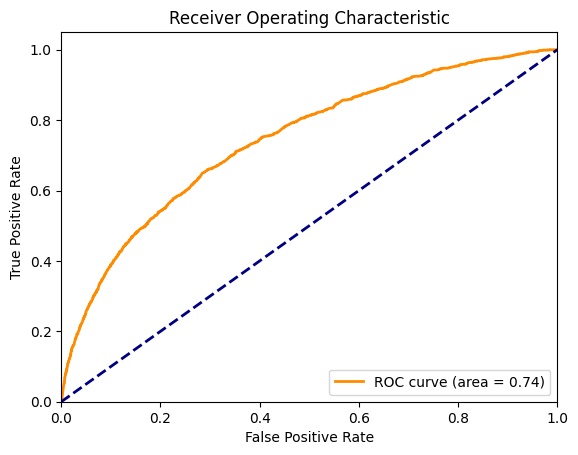

In [39]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [41]:
y_pred = clf.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_pred)

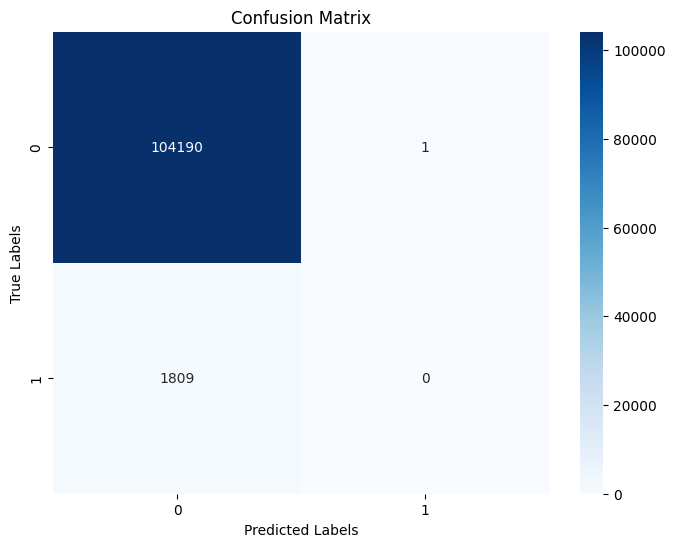

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [44]:
!pip install imbalanced-learn


In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [47]:
y_train_resampled.value_counts()

0    211459
1    211459
Name: storm, dtype: int64

In [48]:
clf.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [49]:
y_pred_resampled = clf.predict(X_train_resampled)

In [50]:
cm_resampled = confusion_matrix(y_train_resampled, y_pred_resampled)

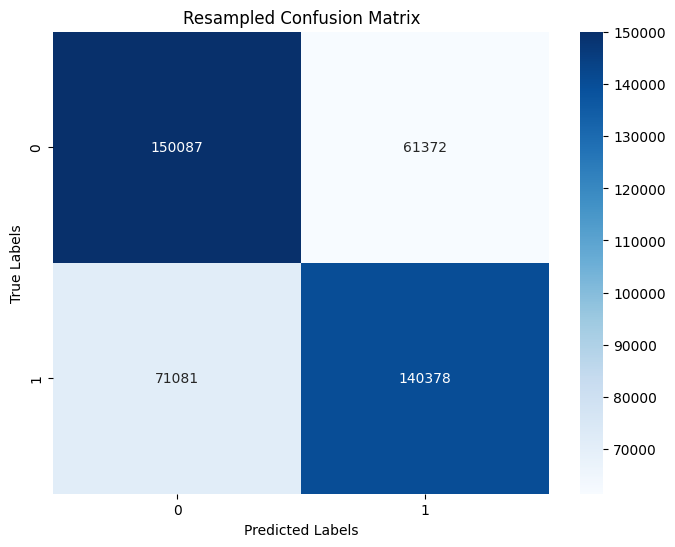

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resampled, annot=True, fmt="d", cmap="Blues")
plt.title("Resampled Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [52]:
clf.score(X_train_resampled, y_train_resampled)

0.686811627786001

In [53]:
clf.score(X_test, y_test)

0.7073301886792452

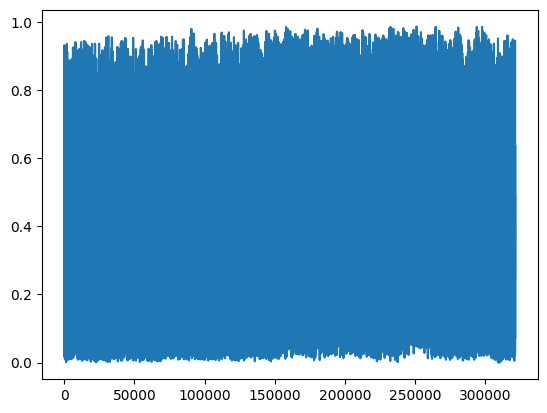

In [54]:
y_proba = clf.predict_proba(X)[:, 1]
plt.plot(y_proba)


In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

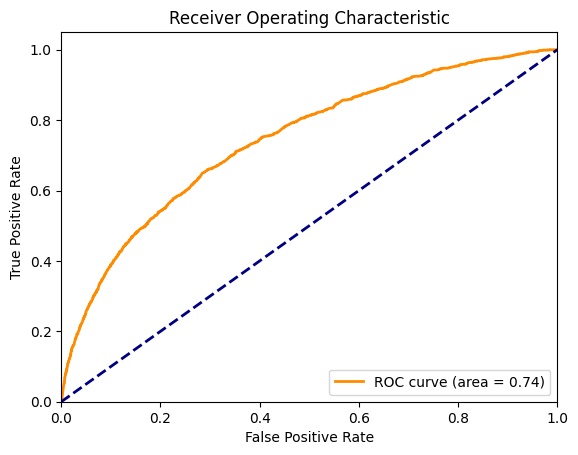

In [57]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
!pip install geopandas matplotlib

In [59]:
import geopandas as gpd

In [60]:
import matplotlib.pyplot as plt

In [65]:
map_gdf = gpd.read_file('/content/drive/My Drive/project work/polygons_BRT.shp')

In [75]:
X['new_column'] = y_proba

<ipython-input-75-898f08bd0c9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['new_column'] = y_proba


In [81]:
X["poly_ID"]=df.poly_ID.values

<ipython-input-81-8c2139d8f83e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["poly_ID"]=df.poly_ID.values


In [114]:
from shapely.geometry import Polygon

In [123]:
map_gdf=map_gdf.merge(X[["poly_ID","new_column"]], on='poly_ID')


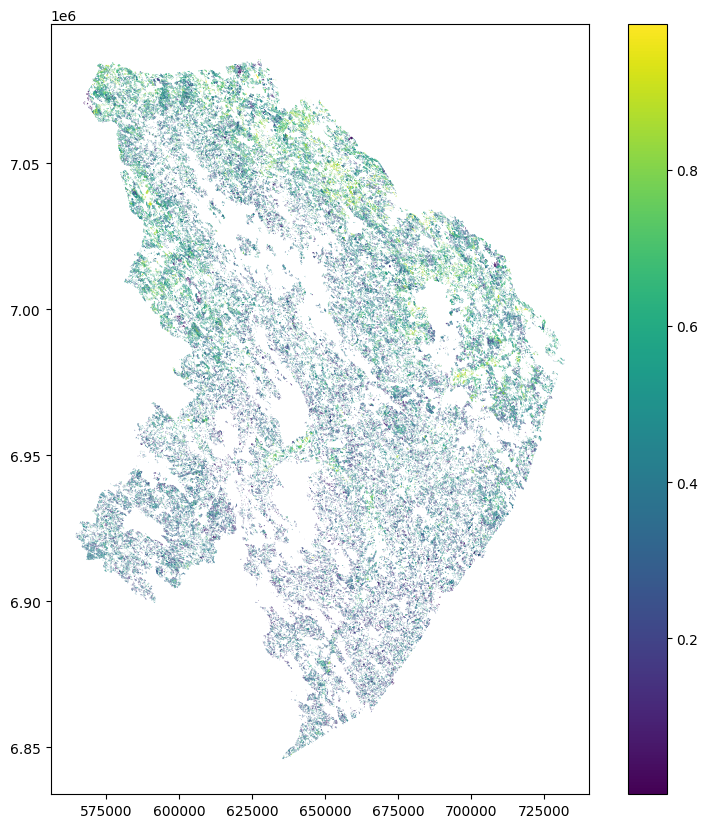

In [127]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
map_gdf.plot(column="new_column",legend=True,ax=ax)
plt.show()